In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import pytz
import numpy as np
from matplotlib.patches import Rectangle
from IPython.display import display
from datetime import timedelta

group1 = [10,11,12,13] # Arodene
group2 = [15,16,17,18] # Archbishop
group3 = [19,20,21] # Rowley
group4 = [24,25,28,29] # Rowley 2

allGroups = group1+group2+group3+group4

bookings = pd.read_json("../../ec_data/all_bookingsFINAL.json")

bookings = pd.DataFrame(bookings.fields.values.tolist())

# switch to a faster method of parsing datetime strings by inferring the format
bookings['start'] = pd.to_datetime(bookings['start'],infer_datetime_format=True).dt.floor('S')
bookings['created_at'] = pd.to_datetime(bookings['created_at'],infer_datetime_format=True).dt.floor('S')
bookings['modified_at'] = pd.to_datetime(bookings['modified_at'],infer_datetime_format=True).dt.floor('S')

In [42]:
g1Bookings = bookings.loc[bookings['user'].isin(group1)].copy()
g2Bookings = bookings.loc[bookings['user'].isin(group2)].copy()
g3Bookings = bookings.loc[bookings['user'].isin(group3)].copy()
g4Bookings = bookings.loc[bookings['user'].isin(group4)].copy()

g1W1CoordinationStartDate = datetime.datetime(2023,4,21,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g1W2CoordinationStartDate = datetime.datetime(2023,4,28,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g1W3CoordinationStartDate = datetime.datetime(2023,5,5,0,0,0,0,tzinfo=pytz.timezone('UTC'))

g2W1CoordinationStartDate = datetime.datetime(2023,6,5,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g2W2CoordinationStartDate = datetime.datetime(2023,6,12,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g2W3CoordinationStartDate = datetime.datetime(2023,6,19,0,0,0,0,tzinfo=pytz.timezone('UTC'))


g3W1CoordinationStartDate = datetime.datetime(2023,6,19,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g3W2CoordinationStartDate = datetime.datetime(2023,6,26,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g3W3CoordinationStartDate = datetime.datetime(2023,7,3,0,0,0,0,tzinfo=pytz.timezone('UTC'))


g4W1CoordinationStartDate = datetime.datetime(2023,7,8,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g4W2CoordinationStartDate = datetime.datetime(2023,7,15,0,0,0,0,tzinfo=pytz.timezone('UTC'))
g4W3CoordinationStartDate = datetime.datetime(2023,7,22,0,0,0,0,tzinfo=pytz.timezone('UTC'))


In [63]:
# add week of booking for group 1
g1Bookings['week_of_booking'] = 0

for index, row in g1Bookings.iterrows():
    if g1W1CoordinationStartDate <= row['start'] < g1W2CoordinationStartDate:
        g1Bookings.at[index, 'week_of_booking'] = 1
    elif g1W2CoordinationStartDate <= row['start'] < g1W3CoordinationStartDate:
        g1Bookings.at[index, 'week_of_booking'] = 2
    elif g1W3CoordinationStartDate <= row['start'] < g1W3CoordinationStartDate + timedelta(days=10):
        g1Bookings.at[index, 'week_of_booking'] = 3

with pd.option_context('display.max_rows', None):
    display(g1Bookings) 

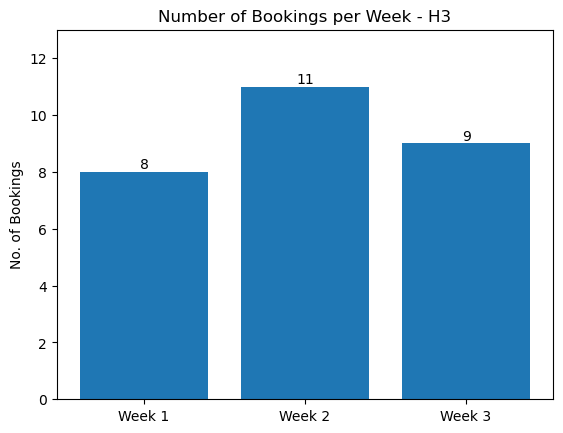

In [168]:
bookingsUser10 = g1Bookings.loc[g1Bookings['user'] == 10].copy()

weeks = ['Week 1', 'Week 2', 'Week 3']
bookings = [len(bookingsUser10.loc[bookingsUser10['week_of_booking'] == 1]), 
            len(bookingsUser10.loc[bookingsUser10['week_of_booking'] == 2]), 
            len(bookingsUser10.loc[bookingsUser10['week_of_booking'] == 3])]

plt.bar(weeks, bookings)

plt.ylabel('No. of Bookings')
plt.title("Number of Bookings per Week - H3")

for i, val in enumerate(bookings):
    plt.annotate(str(val), (i, val), ha='center', va='bottom')
    
plt.ylim(0, max(bookings) + 2)

plt.savefig('number_of_bookings_per_week_h3.png', dpi=300, bbox_inches='tight')
plt.show()

# bookingsUser10

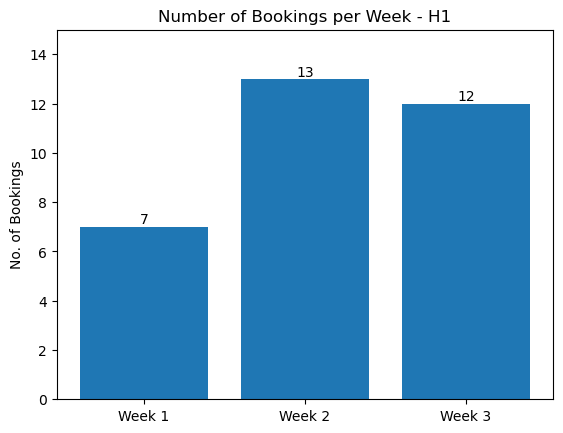

In [169]:
bookingsUser11 = g1Bookings.loc[g1Bookings['user'] == 11].copy()

weeks = ['Week 1', 'Week 2', 'Week 3']
bookings = [len(bookingsUser11.loc[bookingsUser11['week_of_booking'] == 1]), 
            len(bookingsUser11.loc[bookingsUser11['week_of_booking'] == 2]), 
            len(bookingsUser11.loc[bookingsUser11['week_of_booking'] == 3])]

plt.bar(weeks, bookings)

plt.ylabel('No. of Bookings')
plt.title("Number of Bookings per Week - H1")

for i, val in enumerate(bookings):
    plt.annotate(str(val), (i, val), ha='center', va='bottom')
    
plt.ylim(0, max(bookings) + 2)

plt.savefig('number_of_bookings_per_week_h1.png', dpi=300, bbox_inches='tight')
plt.show()

# bookingsUser11

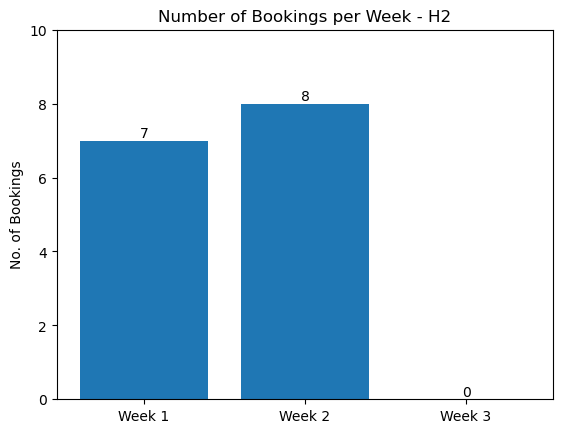

In [170]:
bookingsUser12 = g1Bookings.loc[g1Bookings['user'] == 12].copy()

weeks = ['Week 1', 'Week 2', 'Week 3']
bookings = [len(bookingsUser12.loc[bookingsUser12['week_of_booking'] == 1]), 
            len(bookingsUser12.loc[bookingsUser12['week_of_booking'] == 2]), 
            len(bookingsUser12.loc[bookingsUser12['week_of_booking'] == 3])]

plt.bar(weeks, bookings)

plt.ylabel('No. of Bookings')
plt.title("Number of Bookings per Week - H2")

for i, val in enumerate(bookings):
    plt.annotate(str(val), (i, val), ha='center', va='bottom')
    
plt.ylim(0, max(bookings) + 2)

plt.savefig('number_of_bookings_per_week_h2.png', dpi=300, bbox_inches='tight')
plt.show()

# bookingsUser12

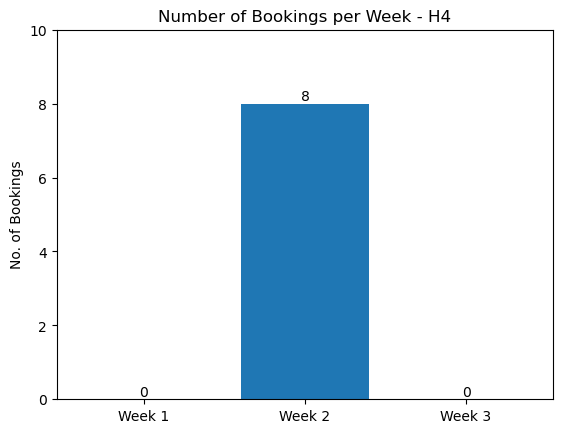

In [171]:
bookingsUser13 = g1Bookings.loc[g1Bookings['user'] == 13].copy()

weeks = ['Week 1', 'Week 2', 'Week 3']
bookings = [len(bookingsUser13.loc[bookingsUser13['week_of_booking'] == 1]), 
            len(bookingsUser13.loc[bookingsUser13['week_of_booking'] == 2]), 
            len(bookingsUser13.loc[bookingsUser13['week_of_booking'] == 3])]

plt.bar(weeks, bookings)

plt.ylabel('No. of Bookings')
plt.title("Number of Bookings per Week - H4")

for i, val in enumerate(bookings):
    plt.annotate(str(val), (i, val), ha='center', va='bottom')
    
plt.ylim(0, max(bookings) + 2)

plt.savefig('number_of_bookings_per_week_h4.png', dpi=300, bbox_inches='tight')
plt.show()

# bookingsUser13

In [77]:
# add week of booking for group 2
g2Bookings['week_of_booking'] = 0

for index, row in g2Bookings.iterrows():
    if g2W1CoordinationStartDate <= row['start'] < g2W2CoordinationStartDate:
        g2Bookings.at[index, 'week_of_booking'] = 1
    elif g2W2CoordinationStartDate <= row['start'] < g2W3CoordinationStartDate:
        g2Bookings.at[index, 'week_of_booking'] = 2
    elif g2W3CoordinationStartDate <= row['start'] < g2W3CoordinationStartDate + timedelta(days=10):
        g2Bookings.at[index, 'week_of_booking'] = 3

# with pd.option_context('display.max_rows', None):
#     display(g2Bookings) 

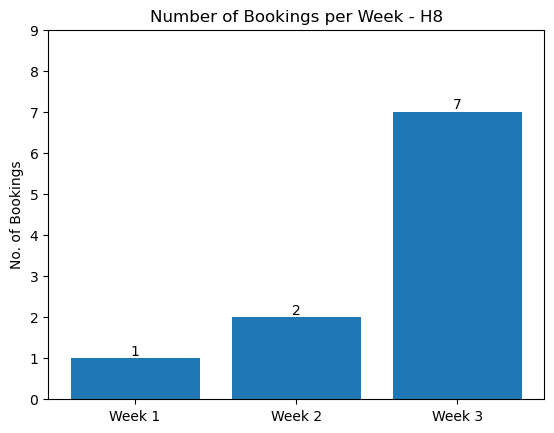

In [172]:
bookingsUser15 = g2Bookings.loc[g2Bookings['user'] == 15].copy()

weeks = ['Week 1', 'Week 2', 'Week 3']
bookings = [len(bookingsUser15.loc[bookingsUser15['week_of_booking'] == 1]), 
            len(bookingsUser15.loc[bookingsUser15['week_of_booking'] == 2]), 
            len(bookingsUser15.loc[bookingsUser15['week_of_booking'] == 3])]

plt.bar(weeks, bookings)

plt.ylabel('No. of Bookings')
plt.title("Number of Bookings per Week - H8")

for i, val in enumerate(bookings):
    plt.annotate(str(val), (i, val), ha='center', va='bottom')
    
plt.ylim(0, max(bookings) + 2)

plt.savefig('number_of_bookings_per_week_h8.png', dpi=300, bbox_inches='tight')
plt.show()

# bookingsUser15

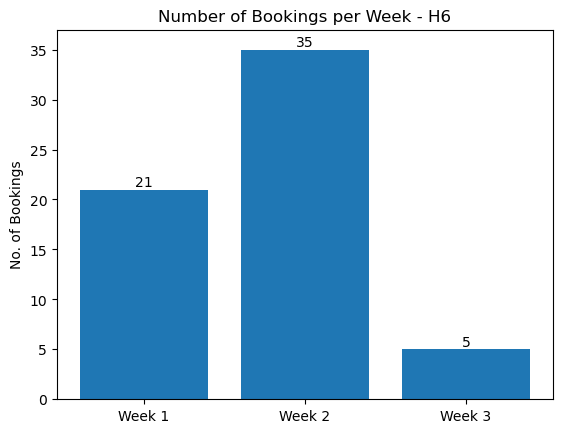

In [173]:
bookingsUser16 = g2Bookings.loc[g2Bookings['user'] == 16].copy()

weeks = ['Week 1', 'Week 2', 'Week 3']
bookings = [len(bookingsUser16.loc[bookingsUser16['week_of_booking'] == 1]), 
            len(bookingsUser16.loc[bookingsUser16['week_of_booking'] == 2]), 
            len(bookingsUser16.loc[bookingsUser16['week_of_booking'] == 3])]

plt.bar(weeks, bookings)

plt.ylabel('No. of Bookings')
plt.title("Number of Bookings per Week - H6")

for i, val in enumerate(bookings):
    plt.annotate(str(val), (i, val), ha='center', va='bottom')
    
plt.ylim(0, max(bookings) + 2)

plt.savefig('number_of_bookings_per_week_h6.png', dpi=300, bbox_inches='tight')
plt.show()

# bookingsUser16

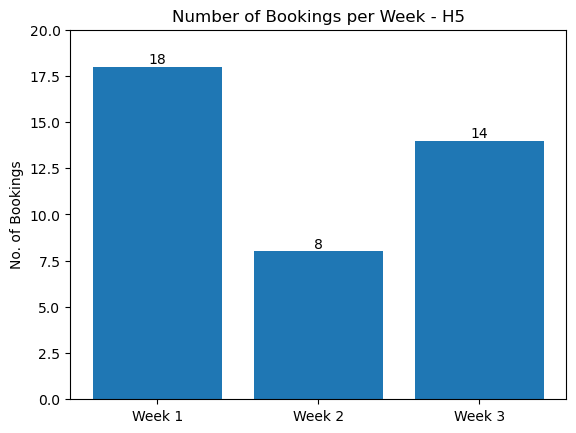

In [174]:
bookingsUser17 = g2Bookings.loc[g2Bookings['user'] == 17].copy()

weeks = ['Week 1', 'Week 2', 'Week 3']
bookings = [len(bookingsUser17.loc[bookingsUser17['week_of_booking'] == 1]), 
            len(bookingsUser17.loc[bookingsUser17['week_of_booking'] == 2]), 
            len(bookingsUser17.loc[bookingsUser17['week_of_booking'] == 3])]

plt.bar(weeks, bookings)

plt.ylabel('No. of Bookings')
plt.title("Number of Bookings per Week - H5")

for i, val in enumerate(bookings):
    plt.annotate(str(val), (i, val), ha='center', va='bottom')
    
plt.ylim(0, max(bookings) + 2)

plt.savefig('number_of_bookings_per_week_h5.png', dpi=300, bbox_inches='tight')
plt.show()

# bookingsUser17

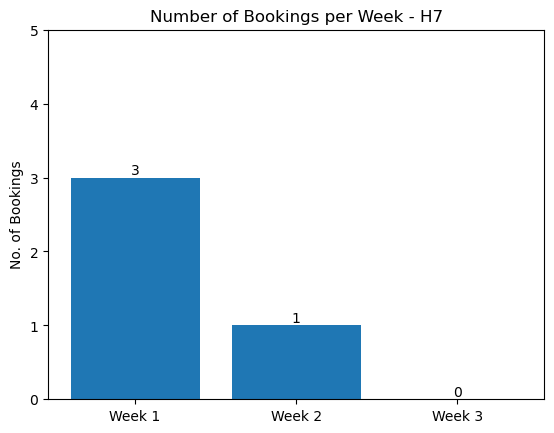

In [175]:
bookingsUser18 = g2Bookings.loc[g2Bookings['user'] == 18].copy()

weeks = ['Week 1', 'Week 2', 'Week 3']
bookings = [len(bookingsUser18.loc[bookingsUser18['week_of_booking'] == 1]), 
            len(bookingsUser18.loc[bookingsUser18['week_of_booking'] == 2]), 
            len(bookingsUser18.loc[bookingsUser18['week_of_booking'] == 3])]

plt.bar(weeks, bookings)

plt.ylabel('No. of Bookings')
plt.title("Number of Bookings per Week - H7")

for i, val in enumerate(bookings):
    plt.annotate(str(val), (i, val), ha='center', va='bottom')
    
plt.ylim(0, max(bookings) + 2)

plt.savefig('number_of_bookings_per_week_h7.png', dpi=300, bbox_inches='tight')
plt.show()

# bookingsUser18

In [85]:
# add week of booking for group 3
g3Bookings['week_of_booking'] = 0

for index, row in g3Bookings.iterrows():
    if g3W1CoordinationStartDate <= row['start'] < g3W2CoordinationStartDate:
        g3Bookings.at[index, 'week_of_booking'] = 1
    elif g3W2CoordinationStartDate <= row['start'] < g3W3CoordinationStartDate:
        g3Bookings.at[index, 'week_of_booking'] = 2
    elif g3W3CoordinationStartDate <= row['start'] < g3W3CoordinationStartDate + timedelta(days=10):
        g3Bookings.at[index, 'week_of_booking'] = 3

# with pd.option_context('display.max_rows', None):
#     display(g3Bookings) 

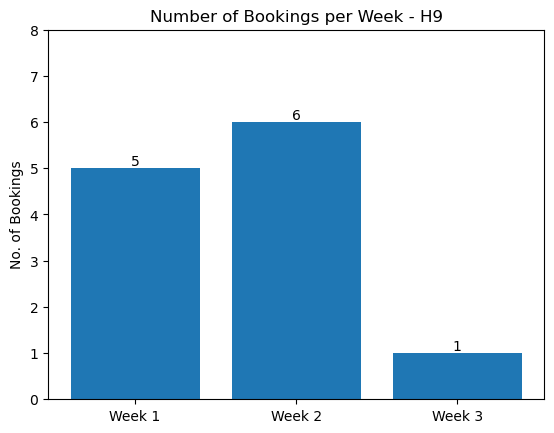

In [176]:
bookingsUser19 = g3Bookings.loc[g3Bookings['user'] == 19].copy()

weeks = ['Week 1', 'Week 2', 'Week 3']
bookings = [len(bookingsUser19.loc[bookingsUser19['week_of_booking'] == 1]), 
            len(bookingsUser19.loc[bookingsUser19['week_of_booking'] == 2]), 
            len(bookingsUser19.loc[bookingsUser19['week_of_booking'] == 3])]

plt.bar(weeks, bookings)

plt.ylabel('No. of Bookings')
plt.title("Number of Bookings per Week - H9")

for i, val in enumerate(bookings):
    plt.annotate(str(val), (i, val), ha='center', va='bottom')
    
plt.ylim(0, max(bookings) + 2)

plt.savefig('number_of_bookings_per_week_h9.png', dpi=300, bbox_inches='tight')
plt.show()

# bookingsUser19

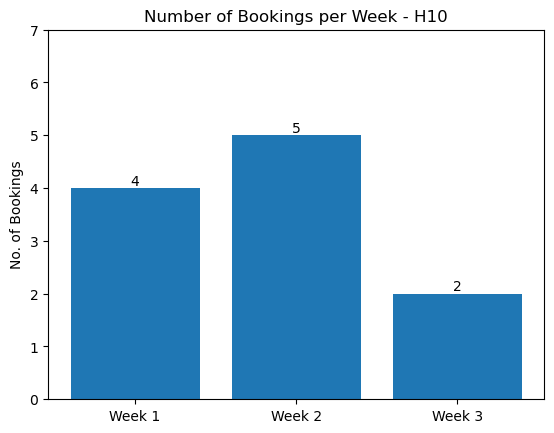

In [177]:
bookingsUser20 = g3Bookings.loc[g3Bookings['user'] == 20].copy()

weeks = ['Week 1', 'Week 2', 'Week 3']
bookings = [len(bookingsUser20.loc[bookingsUser20['week_of_booking'] == 1]), 
            len(bookingsUser20.loc[bookingsUser20['week_of_booking'] == 2]), 
            len(bookingsUser20.loc[bookingsUser20['week_of_booking'] == 3])]

plt.bar(weeks, bookings)

plt.ylabel('No. of Bookings')
plt.title("Number of Bookings per Week - H10")

for i, val in enumerate(bookings):
    plt.annotate(str(val), (i, val), ha='center', va='bottom')
    
plt.ylim(0, max(bookings) + 2)

plt.savefig('number_of_bookings_per_week_h10.png', dpi=300, bbox_inches='tight')
plt.show()

# bookingsUser20

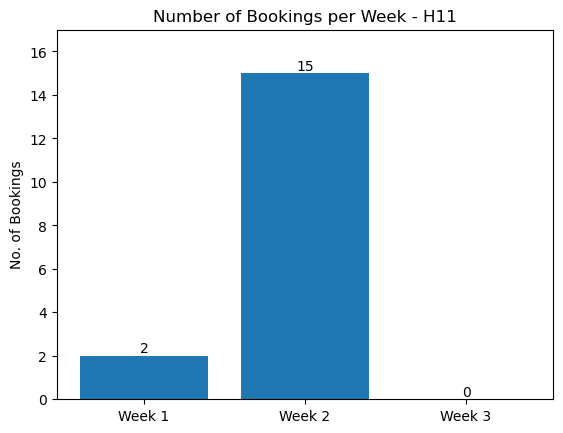

17


In [178]:
bookingsUser21 = g3Bookings.loc[g3Bookings['user'] == 21].copy()

weeks = ['Week 1', 'Week 2', 'Week 3']
bookings = [len(bookingsUser21.loc[bookingsUser21['week_of_booking'] == 1]), 
            len(bookingsUser21.loc[bookingsUser21['week_of_booking'] == 2]), 
            len(bookingsUser21.loc[bookingsUser21['week_of_booking'] == 3])]

plt.bar(weeks, bookings)

plt.ylabel('No. of Bookings')
plt.title("Number of Bookings per Week - H11")

for i, val in enumerate(bookings):
    plt.annotate(str(val), (i, val), ha='center', va='bottom')
    
plt.ylim(0, max(bookings) + 2)

plt.savefig('number_of_bookings_per_week_h11.png', dpi=300, bbox_inches='tight')
plt.show()

print(len(bookingsUser21))

In [89]:
# add week of booking for group 4
g4Bookings['week_of_booking'] = 0

for index, row in g4Bookings.iterrows():
    if g4W1CoordinationStartDate <= row['start'] < g4W2CoordinationStartDate:
        g4Bookings.at[index, 'week_of_booking'] = 1
    elif g4W2CoordinationStartDate <= row['start'] < g4W3CoordinationStartDate:
        g4Bookings.at[index, 'week_of_booking'] = 2
    elif g4W3CoordinationStartDate <= row['start'] < g4W3CoordinationStartDate + timedelta(days=10):
        g4Bookings.at[index, 'week_of_booking'] = 3

# with pd.option_context('display.max_rows', None):
#     display(g4Bookings) 

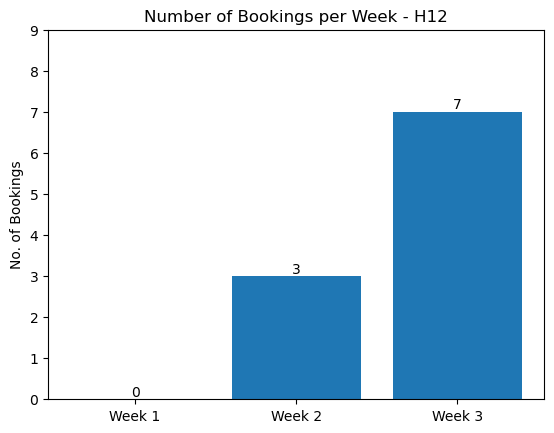

In [179]:
bookingsUser24 = g4Bookings.loc[g4Bookings['user'] == 24].copy()

weeks = ['Week 1', 'Week 2', 'Week 3']
bookings = [len(bookingsUser24.loc[bookingsUser24['week_of_booking'] == 1]), 
            len(bookingsUser24.loc[bookingsUser24['week_of_booking'] == 2]), 
            len(bookingsUser24.loc[bookingsUser24['week_of_booking'] == 3])]

plt.bar(weeks, bookings)

plt.ylabel('No. of Bookings')
plt.title("Number of Bookings per Week - H12")

for i, val in enumerate(bookings):
    plt.annotate(str(val), (i, val), ha='center', va='bottom')
    
plt.ylim(0, max(bookings) + 2)

plt.savefig('number_of_bookings_per_week_h12.png', dpi=300, bbox_inches='tight')
plt.show()

# bookingsUser24

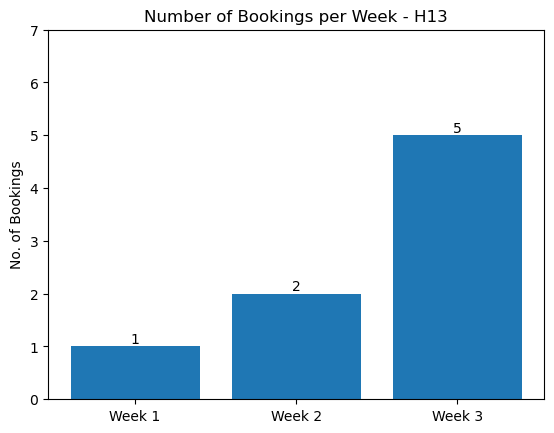

In [180]:
bookingsUser25 = g4Bookings.loc[g4Bookings['user'] == 25].copy()

weeks = ['Week 1', 'Week 2', 'Week 3']
bookings = [len(bookingsUser25.loc[bookingsUser25['week_of_booking'] == 1]), 
            len(bookingsUser25.loc[bookingsUser25['week_of_booking'] == 2]), 
            len(bookingsUser25.loc[bookingsUser25['week_of_booking'] == 3])]

plt.bar(weeks, bookings)

plt.ylabel('No. of Bookings')
plt.title("Number of Bookings per Week - H13")

for i, val in enumerate(bookings):
    plt.annotate(str(val), (i, val), ha='center', va='bottom')
    
plt.ylim(0, max(bookings) + 2)

plt.savefig('number_of_bookings_per_week_h13.png', dpi=300, bbox_inches='tight')
plt.show()

# bookingsUser25

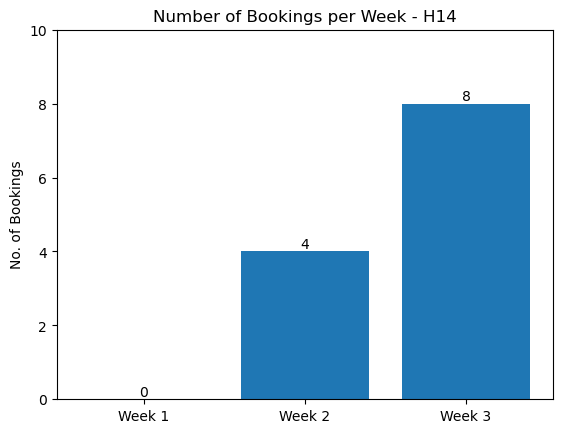

In [181]:
bookingsUser28 = g4Bookings.loc[g4Bookings['user'] == 28].copy()

weeks = ['Week 1', 'Week 2', 'Week 3']
bookings = [len(bookingsUser28.loc[bookingsUser28['week_of_booking'] == 1]), 
            len(bookingsUser28.loc[bookingsUser28['week_of_booking'] == 2]), 
            len(bookingsUser28.loc[bookingsUser28['week_of_booking'] == 3])]

plt.bar(weeks, bookings)

plt.ylabel('No. of Bookings')
plt.title("Number of Bookings per Week - H14")

for i, val in enumerate(bookings):
    plt.annotate(str(val), (i, val), ha='center', va='bottom')
    
plt.ylim(0, max(bookings) + 2)

plt.savefig('number_of_bookings_per_week_h14.png', dpi=300, bbox_inches='tight')
plt.show()

# bookingsUser28

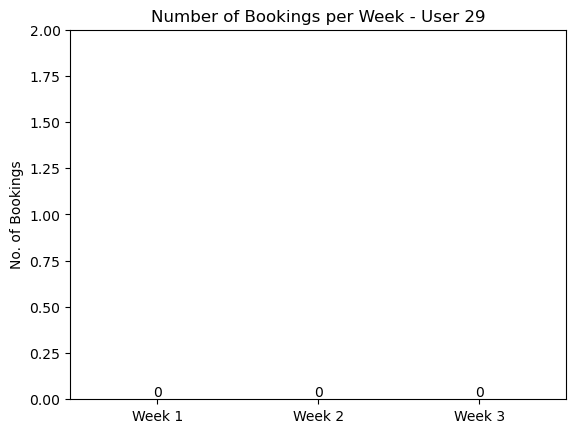

In [182]:
bookingsUser29 = g4Bookings.loc[g4Bookings['user'] == 29].copy()

weeks = ['Week 1', 'Week 2', 'Week 3']
bookings = [len(bookingsUser29.loc[bookingsUser29['week_of_booking'] == 1]), 
            len(bookingsUser29.loc[bookingsUser29['week_of_booking'] == 2]), 
            len(bookingsUser29.loc[bookingsUser29['week_of_booking'] == 3])]

plt.bar(weeks, bookings)

plt.ylabel('No. of Bookings')
plt.title("Number of Bookings per Week - User 29")

for i, val in enumerate(bookings):
    plt.annotate(str(val), (i, val), ha='center', va='bottom')
    
plt.ylim(0, max(bookings) + 2)

plt.savefig('number_of_bookings_per_week_user_29.png', dpi=300, bbox_inches='tight')
plt.show()

# bookingsUser29

In [135]:
w1Bookings = [g1Bookings.loc[g1Bookings['week_of_booking'] == 1] ,
                  g2Bookings.loc[g2Bookings['week_of_booking'] == 1], 
                  g3Bookings.loc[g3Bookings['week_of_booking'] == 1], 
                  g4Bookings.loc[g4Bookings['week_of_booking'] == 1]]

allW1Bookings = pd.concat(w1Bookings, ignore_index=True)


# print(len(allW1Bookings))

In [118]:
# used for verification

# print(len(g3Bookings.loc[g3Bookings['week_of_booking'] == 1]))

In [117]:
# used for verification

# validG3Week1Bookings = bookings.loc[
#     (
#         (bookings['start'] >= g3W1CoordinationStartDate) & (bookings['start'] < g3W2CoordinationStartDate)
#     ) ]

# print(len(validG3Week1Bookings))

In [136]:
w2Bookings = [g1Bookings.loc[g1Bookings['week_of_booking'] == 2] ,
                  g2Bookings.loc[g2Bookings['week_of_booking'] == 2], 
                  g3Bookings.loc[g3Bookings['week_of_booking'] == 2], 
                  g4Bookings.loc[g4Bookings['week_of_booking'] == 2]]

allW2Bookings = pd.concat(w2Bookings, ignore_index=True)


# print(len(allW2Bookings))

In [137]:
w3Bookings = [g1Bookings.loc[g1Bookings['week_of_booking'] == 3] ,
                  g2Bookings.loc[g2Bookings['week_of_booking'] == 3], 
                  g3Bookings.loc[g3Bookings['week_of_booking'] == 3], 
                  g4Bookings.loc[g4Bookings['week_of_booking'] == 3]]

allW3Bookings = pd.concat(w3Bookings, ignore_index=True)


# print(len(allW3Bookings))

In [139]:
# allBookings = pd.concat([w1Bookings, w2Bookings, w3Bookings], ignore_index=True)
# print(len(allBookings))

In [144]:
w1HouseholdBookingCount = [len(bookingsUser10.loc[bookingsUser10['week_of_booking'] == 1]),
                len(bookingsUser11.loc[bookingsUser11['week_of_booking'] == 1]),
                len(bookingsUser12.loc[bookingsUser12['week_of_booking'] == 1]),
                len(bookingsUser13.loc[bookingsUser13['week_of_booking'] == 1]),
                len(bookingsUser15.loc[bookingsUser15['week_of_booking'] == 1]),
                len(bookingsUser16.loc[bookingsUser16['week_of_booking'] == 1]),
                len(bookingsUser17.loc[bookingsUser17['week_of_booking'] == 1]),
                len(bookingsUser18.loc[bookingsUser18['week_of_booking'] == 1]),
                len(bookingsUser19.loc[bookingsUser19['week_of_booking'] == 1]),
                len(bookingsUser20.loc[bookingsUser20['week_of_booking'] == 1]),
                len(bookingsUser21.loc[bookingsUser21['week_of_booking'] == 1]),
                len(bookingsUser24.loc[bookingsUser24['week_of_booking'] == 1]),
                len(bookingsUser25.loc[bookingsUser25['week_of_booking'] == 1]),
                len(bookingsUser28.loc[bookingsUser28['week_of_booking'] == 1]),
                len(bookingsUser29.loc[bookingsUser29['week_of_booking'] == 1])]

print(w1HouseholdBookingCount)

[8, 7, 7, 0, 1, 21, 18, 3, 5, 4, 2, 0, 1, 0, 0]


In [154]:
# average
w1_booking_count_mean = np.mean(w1HouseholdBookingCount)

# Squared differences from the mean
squared_diff = [(x - w1_booking_count_mean)**2 for x in w1HouseholdBookingCount]

# Sum of squared differences
sum_squared_diff = sum(squared_diff)

# Standard Error of the Mean - SEM
n = len(w1HouseholdBookingCount)
w1_sem = np.sqrt(sum_squared_diff / (n - 1)) / np.sqrt(n)


In [148]:
w2HouseholdBookingCount = [len(bookingsUser10.loc[bookingsUser10['week_of_booking'] == 2]),
                len(bookingsUser11.loc[bookingsUser11['week_of_booking'] == 2]),
                len(bookingsUser12.loc[bookingsUser12['week_of_booking'] == 2]),
                len(bookingsUser13.loc[bookingsUser13['week_of_booking'] == 2]),
                len(bookingsUser15.loc[bookingsUser15['week_of_booking'] == 2]),
                len(bookingsUser16.loc[bookingsUser16['week_of_booking'] == 2]),
                len(bookingsUser17.loc[bookingsUser17['week_of_booking'] == 2]),
                len(bookingsUser18.loc[bookingsUser18['week_of_booking'] == 2]),
                len(bookingsUser19.loc[bookingsUser19['week_of_booking'] == 2]),
                len(bookingsUser20.loc[bookingsUser20['week_of_booking'] == 2]),
                len(bookingsUser21.loc[bookingsUser21['week_of_booking'] == 2]),
                len(bookingsUser24.loc[bookingsUser24['week_of_booking'] == 2]),
                len(bookingsUser25.loc[bookingsUser25['week_of_booking'] == 2]),
                len(bookingsUser28.loc[bookingsUser28['week_of_booking'] == 2]),
                len(bookingsUser29.loc[bookingsUser29['week_of_booking'] == 2])]

print(w2HouseholdBookingCount)

[11, 13, 8, 8, 2, 35, 8, 1, 6, 5, 15, 3, 2, 4, 0]


In [149]:
# average
w2_booking_count_mean = np.mean(w2HouseholdBookingCount)

# Squared differences from the mean
squared_diff = [(x - w2_booking_count_mean)**2 for x in w2HouseholdBookingCount]

# Sum of squared differences
sum_squared_diff = sum(squared_diff)

# Standard Error of the Mean - SEM
n = len(w2HouseholdBookingCount)
w2_sem = np.sqrt(sum_squared_diff / (n - 1)) / np.sqrt(n)

15
2.237061564741669


In [150]:
w3HouseholdBookingCount = [len(bookingsUser10.loc[bookingsUser10['week_of_booking'] == 3]),
                len(bookingsUser11.loc[bookingsUser11['week_of_booking'] == 3]),
                len(bookingsUser12.loc[bookingsUser12['week_of_booking'] == 3]),
                len(bookingsUser13.loc[bookingsUser13['week_of_booking'] == 3]),
                len(bookingsUser15.loc[bookingsUser15['week_of_booking'] == 3]),
                len(bookingsUser16.loc[bookingsUser16['week_of_booking'] == 3]),
                len(bookingsUser17.loc[bookingsUser17['week_of_booking'] == 3]),
                len(bookingsUser18.loc[bookingsUser18['week_of_booking'] == 3]),
                len(bookingsUser19.loc[bookingsUser19['week_of_booking'] == 3]),
                len(bookingsUser20.loc[bookingsUser20['week_of_booking'] == 3]),
                len(bookingsUser21.loc[bookingsUser21['week_of_booking'] == 3]),
                len(bookingsUser24.loc[bookingsUser24['week_of_booking'] == 3]),
                len(bookingsUser25.loc[bookingsUser25['week_of_booking'] == 3]),
                len(bookingsUser28.loc[bookingsUser28['week_of_booking'] == 3]),
                len(bookingsUser29.loc[bookingsUser29['week_of_booking'] == 3])]

print(w3HouseholdBookingCount)

[9, 12, 0, 0, 7, 5, 14, 0, 1, 2, 0, 7, 5, 8, 0]


In [151]:
# average
w3_booking_count_mean = np.mean(w3HouseholdBookingCount)

# Squared differences from the mean
squared_diff = [(x - w3_booking_count_mean)**2 for x in w3HouseholdBookingCount]

# Sum of squared differences
sum_squared_diff = sum(squared_diff)

# Standard Error of the Mean - SEM
n = len(w3HouseholdBookingCount)
w3_sem = np.sqrt(sum_squared_diff / (n - 1)) / np.sqrt(n)

In [160]:
# weeks = ['Week 1', 'Week 2', 'Week 3']
# bookings = [len(validWeek1Bookings), len(validWeek2Bookings), len(validWeek3Bookings)]

# plt.bar(weeks, bookings)

# plt.ylabel('No. of Bookings')
# plt.title("Number of Bookings per Week")

# for i, val in enumerate(bookings):
#     plt.annotate(str(val), (i, val), ha='center', va='bottom')
    
# plt.ylim(0, max(bookings) + 20)

# plt.savefig('number_of_bookings_per_week.png', dpi=300, bbox_inches='tight')
# plt.show()

In [161]:
# len(allGroups)

In [162]:
# weeks = ['Week 1', 'Week 2', 'Week 3']
# bookings = [round(len(validWeek1Bookings)/len(allGroups)), round(len(validWeek2Bookings)/len(allGroups)), round(len(validWeek3Bookings)/len(allGroups))]

# plt.bar(weeks, bookings)

# plt.ylabel('Average No. of Bookings')
# plt.title("Average No. of Bookings per Househould per Week")

# for i, val in enumerate(bookings):
#     plt.annotate(str(val), (i, val), ha='center', va='bottom')
    
# plt.ylim(0, max(bookings) + 3)

# plt.savefig('avg_number_of_bookings_per_week.png', dpi=300, bbox_inches='tight')
# plt.show()

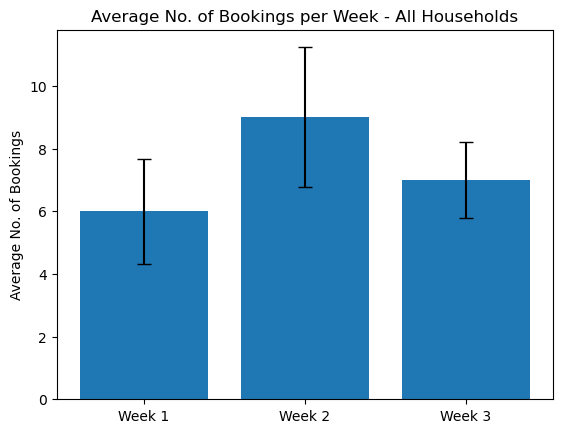

In [164]:
booking_data = {
    'Groups': ['Week 1', 'Week 2', 'Week 3'],
    'Means': [round(len(validWeek1Bookings)/len(allGroups)), 
              round(len(validWeek2Bookings)/len(allGroups)), 
              round(len(validWeek3Bookings)/len(allGroups))],
    'Std_Errors': [w1_sem, w2_sem, w3_sem],
}

# Create a DataFrame from the booking data
df = pd.DataFrame(booking_data)

# Calculate upper and lower bounds for error bars
df['Upper'] = df['Means'] + df['Std_Errors']
df['Lower'] = df['Means'] - df['Std_Errors']

# Create the bar chart with error bars
plt.bar(df['Groups'], df['Means'], yerr=df['Std_Errors'], capsize=5)

plt.ylabel('Average No. of Bookings')
plt.title("Average No. of Bookings per Week - All Households")

plt.savefig('avg_number_of_bookings_per_week_with_error_bars.png', dpi=300, bbox_inches='tight')
plt.show()